# Assignment: Classification of Fashion Items

In this assignment, you will classify fashion articles from the [MNIST fashion dataset](https://github.com/zalandoresearch/fashion-mnist) using two different tools: a k-nearest neighbor classifier and a dense neural network (multilayer perceptron). The relevant material for this assignment is covered in lectures 8 and 9. The assignment instructions are provided on Canvas.

## Boilerplate Notebook Code

Below, you find the boilerplate code that you have to use for the assignment, including basic instructions.
Note that you may need to change the dependency installation procedure.
Debug by removing the `%%capture` line.
If you use a [virtual environment](https://docs.python.org/3/library/venv.html), make sure you can set the notebook's kernel accordingly (assuming your virtual environment is called `venv`):

```
pip3 install ipykernel
python -m ipykernel install --user --name=venv
```

Then, also remove the flags `--user -Iv` below.

In [49]:
%%capture
# Install the dependencies (in case you use Google Colab, these should be available by default, though)
# In case the installation fails or does not yield the desired results remove the `%%capture` line for debugging.
# In case of issues with the import of dependencies, see: https://stackoverflow.com/questions/50914761/jupyter-notebook-cant-find-modules-for-python
! pip install --user -Iv numpy matplotlib pandas scikit-learn

In [50]:
import numpy as np
np.random.seed(42)  # Set the random seed for reproducible results

In [51]:
# Load the Fashion MNIST dataset (this may take a while)

import sklearn.datasets

data = sklearn.datasets.fetch_openml("Fashion-MNIST")

print(data.DESCR)

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [52]:
# Split the data into training, (validation), and test set

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(data.data, data.target, test_size=0.25, random_state=1)

# You may alternatively skip this / have a combined Xtrain and Xval here and instead use cross-validation below
Xtest, Xval, ytest, yval = train_test_split(Xtest, ytest, test_size=0.5, random_state=1)
Xtrain =  np.asarray(Xtrain)
Xtest =  np.asarray(Xtest)
Xval =  np.asarray(Xval)
ytrain =  np.asarray(ytrain)
ytest =  np.asarray(ytest)
yval =  np.asarray(yval)


# Note! Do not touch the test data until the very end!

print(f"Training set size X   : {Xtrain.shape}")
print(f"Training set size y   : {ytrain.shape}")
print(f"Validation set size X : {Xval.shape}")
print(f"Validation set size y : {yval.shape}")
print(f"Test set size X       : {Xtest.shape}")
print(f"Test set size y       : {ytest.shape}")
print(f"Output classes        : {set(ytrain)}")

Training set size X   : (52500, 784)
Training set size y   : (52500,)
Validation set size X : (8750, 784)
Validation set size y : (8750,)
Test set size X       : (8750, 784)
Test set size y       : (8750,)
Output classes        : {'1', '6', '9', '3', '0', '8', '2', '4', '5', '7'}


In [53]:
# Preprocess the data
import sklearn.preprocessing

print(f"Before preprocessing, test data       : "
      f"min = {np.min(Xtrain):.1f}, "
      f"max = {np.max(Xtrain):.1f}, "
      f"mean = {np.mean(Xtrain):.1f}, "
      f"std = {np.std(Xtrain):.1f}")
print(f"Before preprocessing, validation data : "
      f"min = {np.min(Xval):.1f}, "
      f"max = {np.max(Xval):.1f}, "
      f"mean = {np.mean(Xval):.1f}, "
      f"std = {np.std(Xval):.1f}")
print(f"Before preprocessing, test data       : "
      f"min = {np.min(Xtest):.1f}, "
      f"max = {np.max(Xtest):.1f}, "
      f"mean = {np.mean(Xtest):.1f}, "
      f"std = {np.std(Xtest):.1f}")

scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler.fit(Xtrain)  # Every statistic we compute is found on the training data!

Xtrain = scaler.transform(Xtrain)
Xval = scaler.transform(Xval)
# TODO: If you do cross-validation, you must redo this on the training data in
#       each cross-validation loop, and then transform the validation data as
#       well!
Xtest = scaler.transform(Xtest)

print(f"After preprocessing, test data        : "
      f"min = {np.min(Xtrain):.1f}, "
      f"max = {np.max(Xtrain):.1f}, "
      f"mean = {np.mean(Xtrain):.1f}, "
      f"std = {np.std(Xtrain):.1f}")
print(f"After preprocessing, validation data  : "
      f"min = {np.min(Xval):.1f}, "
      f"max = {np.max(Xval):.1f}, "
      f"mean = {np.mean(Xval):.1f}, "
      f"std = {np.std(Xval):.1f}")
print(f"After preprocessing, test data        : "
      f"min = {np.min(Xtest):.1f}, "
      f"max = {np.max(Xtest):.1f}, "
      f"mean = {np.mean(Xtest):.1f}, "
      f"std = {np.std(Xtest):.1f}")

# TODO: Try to apply other preprocessing, e.g. the
#       sklearn.preprocessing.StandardScaler(), and see if the results improve.

Before preprocessing, test data       : min = 0.0, max = 255.0, mean = 72.9, std = 89.9
Before preprocessing, validation data : min = 0.0, max = 255.0, mean = 73.5, std = 90.3
Before preprocessing, test data       : min = 0.0, max = 255.0, mean = 72.9, std = 90.1
After preprocessing, test data        : min = -1.0, max = 1.0, mean = -0.4, std = 0.7
After preprocessing, validation data  : min = -1.0, max = 1.2, mean = -0.4, std = 0.7
After preprocessing, test data        : min = -1.0, max = 1.7, mean = -0.4, std = 0.7


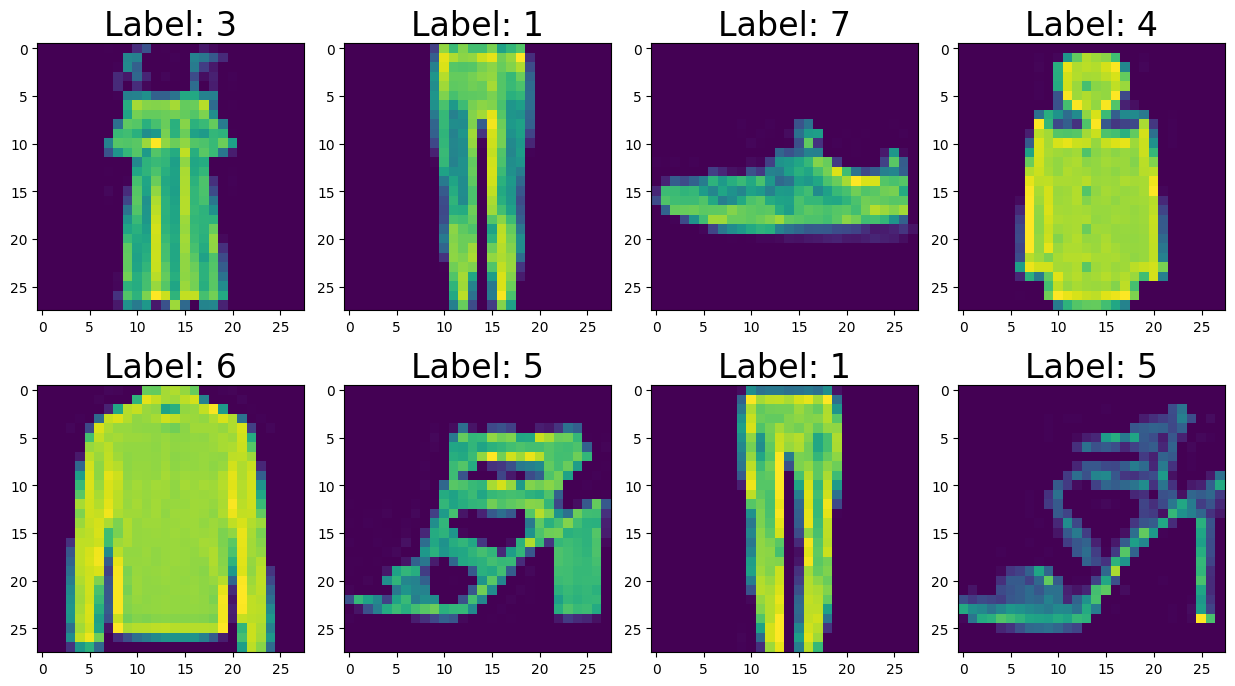

In [54]:
# Plot a few images

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 7.75))
fig.subplots_adjust(top=0.995,
                    bottom=0.115,
                    left=0.005,
                    right=0.995,
                    wspace=0.15,
                    hspace=0.005)

plot_array = (2, 4)
ax = [[None] * plot_array[1]] * plot_array[0]
it = 0
for i in range(plot_array[0]):
    for j in range(plot_array[1]):
        ax[i][j] = plt.subplot2grid((2, 4), (i, j), rowspan=1, colspan=1)
        ax[i][j].imshow(Xtrain[it, :].reshape((28, 28)))
        ax[i][j].set_title(f"Label: {ytrain[it]}", fontsize=24)
        it += 1

### The $k$-NN model

You have to implement the $k$-NN classifier yourself. The below implementation uses the scikit-learn implementation of the $k$-NN classifier, but you need to do it yourself. Also, perform a hyper-parameter search for the optimal number of neighbors, $k$.

In [ ]:
# ============================================================
# k-Nearest Neighbors (k-NN) Classifier Implementation
# ============================================================

class knn_Classifier:
    """
    Simple implementation of the k-Nearest Neighbors (k-NN) classifier.

    Parameters
    ----------
    n_neighbors : int, optional (default=5)
        Number of nearest neighbors to consider for classification.
    """

    def __init__(self, n_neighbors=5):
        """Initialize the classifier with the given number of neighbors."""
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        """
        Store the training data.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Training feature data.
        y : ndarray of shape (n_samples,)
            Training labels.
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predict the class labels for the input samples using k-NN.

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input feature data to classify.

        Returns
        -------
        predictions : ndarray of shape (n_samples,)
            Predicted class labels for each input sample.
        """
        predictions = []

        # Iterate through each sample to predict its label
        for x in X:
            # Compute Euclidean distance between x and all training samples
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))

            # Get indices of k nearest neighbors
            knn_indices = np.argsort(distances)[:self.n_neighbors]

            # Get labels of those neighbors
            knn_labels = self.y_train[knn_indices]

            # Select the most frequent label among neighbors
            most_common, counts = np.unique(knn_labels, return_counts=True)
            majority_label = most_common[np.argmax(counts)]

            predictions.append(majority_label)

        return np.array(predictions)

    def score(self, X, y):
        """
        Compute the accuracy of the classifier.

        Parameters
        ----------
        X : ndarray
            Feature data to evaluate.
        y : ndarray
            True labels.

        Returns
        -------
        accuracy : float
            The proportion of correctly classified samples.
        """
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


In [ ]:
# ============================================================
# Grid Search for Optimal Number of Neighbors (k) in k-NN
# ============================================================

# Maximum number of neighbors we tested
k_max = 6  
validation_accuracies = []

# Looping through possible k values to find the best one
for k in range(1, k_max + 1):
    # Initialize model with current k value
    model = knn_Classifier(n_neighbors=k)

    # Fit the model on the training data
    model.fit(Xtrain[:5000], ytrain[:5000])

    # Evaluate accuracy on the validation dataset
    accuracy = model.score(Xval[:5000], yval[:5000])

    # Display and store the result
    print(f"Number of neighbors: k={k}, Validation Accuracy: {accuracy:.4f}")
    validation_accuracies.append(accuracy)

print("\nGrid search completed successfully!")

# Identifying the best k (index + 1 because range starts at 1)
best_k = np.argmax(validation_accuracies) + 1
best_accuracy = validation_accuracies[best_k - 1]

print(f"Best k value: {best_k} with Validation Accuracy = {best_accuracy:.4f}")


Number of neighbors: k=1, validation accuracy: 0.8459428571428571
Number of neighbors: k=2, validation accuracy: 0.8458285714285714
Number of neighbors: k=3, validation accuracy: 0.8531428571428571
Number of neighbors: k=4, validation accuracy: 0.8581714285714286
Number of neighbors: k=5, validation accuracy: 0.8580571428571429
Number of neighbors: k=6, validation accuracy: 0.8594285714285714


KeyboardInterrupt: 

Text(0, 0.5, 'Validation Accuracy')

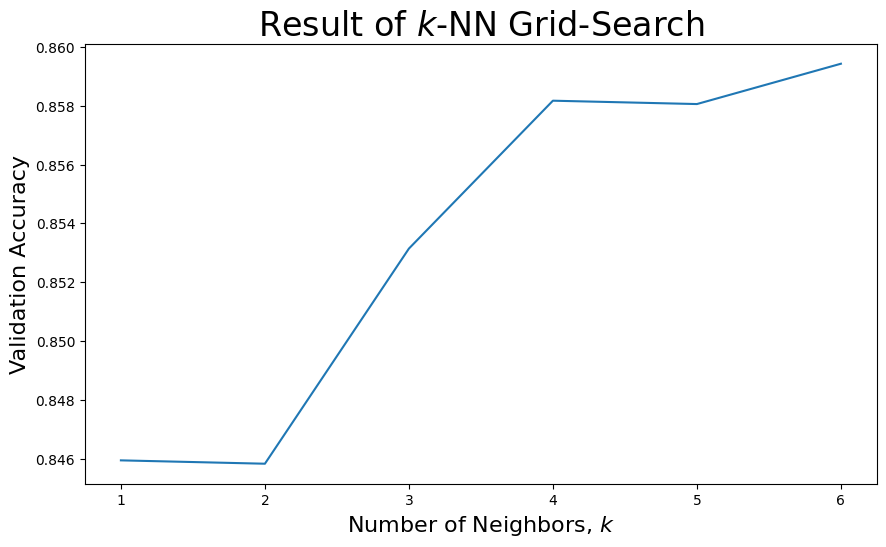

In [ ]:
# ============================================================
# Plot Validation Accuracy as a Function of k (k-NN)
# ============================================================

# Plot the accuracy curve as a function of k

fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(top=0.995,
                    bottom=0.115,
                    left=0.005,
                    right=0.995,
                    wspace=0.15,
                    hspace=0.005)

ax0 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
ax0.plot(range(1, len(validation_accuracies) + 1), validation_accuracies)
ax0.set_title("Result of $k$-NN Grid-Search", fontsize=24)
ax0.set_xlabel("Number of Neighbors, $k$", fontsize=16)
ax0.set_ylabel("Validation Accuracy", fontsize=16)

In [ ]:
# Train the final k-NN model with the best value for k

k_best = np.argmax(validation_accuracies) + 1  # Note that k=1 is at index 0.
print(f"The best value was {validation_accuracies[k_best - 1]}, found using k={k_best}.")

# Initializing and training the final k-NN model using all training data
model_knn = knn_Classifier(n_neighbors=k_best)
model_knn.fit(Xtrain, ytrain)

# Evaluating the model performance on the validation set
val_accuracy = model_knn.score(Xval, yval)
print(f"Final validation accuracy of k-NN model: {val_accuracy:.4f}")

The best value was 0.8594285714285714, found using k=6.


KeyboardInterrupt: 

### The neural network model

We will use the neural networks (multilayer perceptrons) implemented in scikit-learn. You need to find the optimal number of layers, the number of neurons in each of the layers, and any other hyper-parameters that may be relevant. Again, you may first execute the search with a small subset of the data to make sure it works reasonably well.

In [ ]:
# ============================================================================
# Neural Network (ANN) Classifier - Grid Search for Hyperparameters
# ============================================================================

import sklearn.neural_network

# Defining a dictionary to store validation accuracies for each configuration
validation_results = {}

# Defining the layer configurations to test
# Each tuple represents the number of neurons in each hidden layer
layer_configurations = [
    (50,),           # 1 hidden layer, 50 neurons
    (100,),          # 1 hidden layer, 100 neurons
    (150,),          # 1 hidden layer, 150 neurons
    (100, 50),       # 2 hidden layers: 100 and 50 neurons
    (150, 100, 50)   # 3 hidden layers: 150, 100, and 50 neurons
]

# Defining the learning rate to use 
learning_rate_init = 0.0005

# Loop through each network configuration
for hidden_layer_sizes in layer_configurations:

    # Create an MLP (Multilayer Perceptron) classifier
    model = sklearn.neural_network.MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,   # layer structure
        activation='relu',                       # activation function
        solver='adam',                           # optimizer
        alpha=0.0005,                            # L2 regularization term
        batch_size=128,                          # mini-batch size
        learning_rate_init=learning_rate_init,   # initial learning rate
        max_iter=100,                            # training iterations
        random_state=1,                          # for reproducibility
    )

    # Fitting the model on training data
    model.fit(Xtrain, ytrain)

    # Evaluating model on validation data
    val_accuracy = model.score(Xval, yval)
    print(f"Hidden layer sizes: {hidden_layer_sizes}, Validation Accuracy: {val_accuracy:.4f}")

    # Storing validation accuracy for this configuration
    validation_results[hidden_layer_sizes] = val_accuracy

print("\nGrid search completed successfully!")

# Find the best performing configuration
best_configuration = max(validation_results, key=validation_results.get)
best_accuracy = validation_results[best_configuration]

print(f"The best configuration was {best_configuration} "
      f"with Validation Accuracy = {best_accuracy:.4f}.")


Iteration 1, loss = 0.57466783
Iteration 2, loss = 0.39739801
Iteration 3, loss = 0.35822605
Iteration 4, loss = 0.33012786
Iteration 5, loss = 0.31048996
Iteration 6, loss = 0.29752404
Iteration 7, loss = 0.28232368
Iteration 8, loss = 0.27031753
Iteration 9, loss = 0.25999264
Iteration 10, loss = 0.24932725
Iteration 11, loss = 0.24119768
Iteration 12, loss = 0.22861280
Iteration 13, loss = 0.22142530
Iteration 14, loss = 0.21462560
Iteration 15, loss = 0.20840542
Iteration 16, loss = 0.19541599
Iteration 17, loss = 0.19346418
Iteration 18, loss = 0.18500800
Iteration 19, loss = 0.17811676
Iteration 20, loss = 0.17466274
Iteration 21, loss = 0.16844241
Iteration 22, loss = 0.16047584
Iteration 23, loss = 0.15800205
Iteration 24, loss = 0.15000958
Iteration 25, loss = 0.14326126
Iteration 26, loss = 0.13695936
Iteration 27, loss = 0.13702518
Iteration 28, loss = 0.12817211
Iteration 29, loss = 0.12692309
Iteration 30, loss = 0.12319488
Iteration 31, loss = 0.11584630
Iteration 32, los

C:\Users\abdia\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden layer sizes: (150, 100, 50), validation accuracy: 0.8780571428571429
Grid search done!
The best configuration was (150, 100, 50) with accuracy 0.8781.


In [ ]:
# ============================================================
# Training Final ANN Model Using Best Configuration
# ============================================================

# Retrieving the best layer configuration from grid search
hidden_layer_sizes_best = best_configuration
best_val_acc = validation_results[best_configuration]

print(f"Best validation accuracy during grid search: {best_val_acc:.4f}, "
      f"found using layer sizes: {hidden_layer_sizes_best}")

# Initializing the final ANN model with optimized parameters
model_ann = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_best,  # using best architecture
    activation='relu',                           # ReLU activation
    solver='adam',                               # Adam optimizer
    alpha=0.0001,                                # L2 regularization (prevents overfitting)
    batch_size=128,                              # mini-batch size
    learning_rate_init=0.0005,                   # learning rate from grid search
    max_iter=200,                                # higher iteration count for full training
    random_state=1,                              # for reproducibility
)

# Train on the full training dataset
model_ann.fit(Xtrain, ytrain)

# Evaluate performance on the validation data
val_accuracy_final = model_ann.score(Xval, yval)
print(f"Final validation accuracy (ANN): {val_accuracy_final:.4f}")


The best value was 0.8780571428571429, found using layer sizes: (150, 100, 50)
Final validation accuracy: 0.8820571428571429


Once we have selected our final model, we can compute the test error on the final models as the last thing we do. Make sure to only do this at the very end, after you have selected the best models you can find.

In [1]:
# Evaluate the final model on all the data sets, including the test data. We
# only evaluate the test data once, and as the last thing we do. If you train
# another model after this, based on the performance on the test data, then your
# test data is effectively a validation dataset, and you no longer have a test
# dataset. (Or, if you keep your test data set, then your results are biased and
# by that unreliable.)
print(f"k-NN model training data accuracy  : {model_knn.score(Xtrain, ytrain)}")
print(f"k-NN model validation data accuracy: {model_knn.score(Xval, yval)}")
if True:  # Change this to True as the very last thing you do!
    print(f"k-NN model test data accuracy      : "
          f"{model_knn.score(Xtest, ytest)}")

print(f"ANN model training data accuracy   : {model_ann.score(Xtrain, ytrain)}")
print(f"ANN model validation data accuracy : {model_ann.score(Xval, yval)}")
if True:  # Change this to True as the very last thing you do!
    print(f"ANN model test data accuracy       : "
          f"{model_ann.score(Xtest, ytest)}")

NameError: name 'model_knn' is not defined